# merge sort and bubble sort example

In [1]:
def split(input_list):
    """
    Splits a list into two pieces
    :param input_list: list
    :return: left and right lists (list, list)
    """
    input_list_len = len(input_list)
    midpoint = input_list_len // 2
    return input_list[:midpoint], input_list[midpoint:]

In [2]:
def merge_sorted_lists(list_left, list_right):
    """
    Merge two sorted lists
    This is a linear operation
    O(len(list_right) + len(list_right))
    :param left_list: list
    :param right_list: list
    :return merged list
    """
    # Special case: one or both of lists are empty
    if len(list_left) == 0:
        return list_right
    elif len(list_right) == 0:
        return list_left
    
    # General case
    index_left = index_right = 0
    list_merged = []  # list to build and return
    list_len_target = len(list_left) + len(list_right)
    while len(list_merged) < list_len_target:
        if list_left[index_left] <= list_right[index_right]:
            # Value on the left list is smaller (or equal so it should be selected)
            list_merged.append(list_left[index_left])
            index_left += 1
        else:
            # Right value bigger
            list_merged.append(list_right[index_right])
            index_right += 1
            
        # If we are at the end of one of the lists we can take a shortcut
        if index_right == len(list_right):
            # Reached the end of right
            # Append the remainder of left and break
            list_merged += list_left[index_left:]
            break
        elif index_left == len(list_left):
            # Reached the end of left
            # Append the remainder of right and break
            list_merged += list_right[index_right:]
            break
        
    return list_merged

In [3]:
def mergeSort(gvList):
    if len(gvList) <= 1:
        return gvList
    else:
        left, right = split(gvList)
        # recursive function call
        return merge_sorted_lists(mergeSort(left), mergeSort(right))

In [4]:
import sys
my_list = [12, 11, 13, 5, 6] 
my_list = mergeSort(my_list) 
sys.stdout.write ("Sorted array is:[") 
for i in range(len(my_list)): 
    sys.stdout.write(str(my_list[i])+ ',')
sys.stdout.write("]")  

Sorted array is:[5,6,11,12,13,]

In [5]:
def bubblesort(list):
    # Swap the elements to arrange in order
    for iter_num in range(len(list)-1,0,-1):
        for idx in range(iter_num):
            if list[idx]>list[idx+1]:
                temp = list[idx]
                list[idx] = list[idx+1]
                list[idx+1] = temp
    return list

In [6]:
my_list = [12, 11, 13, 5, 6] 
my_list = bubblesort(my_list) 
sys.stdout.write ("Sorted array is:[") 
for i in range(len(my_list)): 
    sys.stdout.write(str(my_list[i])+ ',')
sys.stdout.write("]")  

Sorted array is:[5,6,11,12,13,]

In [7]:
# Create pandas dataframe

import numpy as np
import pandas as pd

v_sorting_algos = ["bubble", "merge"]
df = pd.DataFrame(np.zeros((10,2)), columns = v_sorting_algos, index = [1000*i for i in range(1,11)]) #creates a new dataframe that's empty

In [8]:
# record run time for one case
import time
import numpy as np

rnd_list = list(np.random.randint(100, size=1000000))
# rnd_list = [12, 11, 13, 5, 6]

start = time.time()
mergeSort(rnd_list)
end = time.time()
print("mergeSort", np.round(end - start, 5))

df.loc[1000]["merge"] = np.round(end - start, 5)
df

mergeSort 9.65913


,bubble,merge
1000,0.0,9.65913
2000,0.0,0.00000
3000,0.0,0.00000
4000,0.0,0.00000
5000,0.0,0.00000
6000,0.0,0.00000
7000,0.0,0.00000
8000,0.0,0.00000
9000,0.0,0.00000
10000,0.0,0.00000


In [9]:
# record run time for 10 cases
n_experiments = 10

for i in range(n_experiments):
    np.random.seed(seed=i)
    n_size = 1000*(i+1)
    rnd_list = list(np.random.randint(100, size=n_size))
    
    start = time.time()
    bubblesort(rnd_list)
    end = time.time()
    #print("insertionSort", np.round(end - start, 5))
    
    df.loc[n_size]["bubble"] = np.round(end - start, 5)
df

,bubble,merge
1000,0.09216,9.65913
2000,0.33909,0.00000
3000,0.79089,0.00000
4000,1.40922,0.00000
5000,2.19011,0.00000
6000,3.05984,0.00000
7000,4.25163,0.00000
8000,5.63294,0.00000
9000,7.20974,0.00000
10000,9.09271,0.00000


In [10]:
n_experiments = 10

for i in range(n_experiments):
    np.random.seed(seed=i)
    n_size = 1000*(i+1)
    rnd_list = list(np.random.randint(100, size=n_size))
    
    start = time.time()
    mergeSort(rnd_list)
    end = time.time()
    #print("insertionSort", np.round(end - start, 5))
    
    df.loc[n_size]["merge"] = np.round(end - start, 5)

df

,bubble,merge
1000,0.09216,0.00598
2000,0.33909,0.01199
3000,0.79089,0.01600
4000,1.40922,0.02094
5000,2.19011,0.02897
6000,3.05984,0.03541
7000,4.25163,0.03595
8000,5.63294,0.04488
9000,7.20974,0.05182
10000,9.09271,0.05685


In [11]:
df["ratio (%)"] = 100*np.round(df["merge"]/df["bubble"],3)
df

,bubble,merge,ratio (%)
1000,0.09216,0.00598,6.5
2000,0.33909,0.01199,3.5
3000,0.79089,0.01600,2.0
4000,1.40922,0.02094,1.5
5000,2.19011,0.02897,1.3
6000,3.05984,0.03541,1.2
7000,4.25163,0.03595,0.8
8000,5.63294,0.04488,0.8
9000,7.20974,0.05182,0.7
10000,9.09271,0.05685,0.6


# insertion sort exercise

In [12]:
import numpy as np
n = 4 # the size of the array
random_numbers = np.random.rand(n)
random_numbers

array([0.35503711, 0.66048323, 0.03898472, 0.21916632])

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [14]:
def SortArray(input_list):
    A = np.copy(input_list)
    n = A.shape[0]
    for j in range(1, n):
        key = A[j]
        i = j-1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A

In [15]:
def PlotTimes(n):
    time_list = np.zeros(n - 2)
    for i in range(2, n):
        start_time = time.time()
        test = np.random.rand(i)
        sorted_array = SortArray(test)
        time_list[i-2] = time.time() - start_time
    plt.plot(np.linspace(2, n - 1, n - 2), time_list, 'ro')
    plt.show()
    return

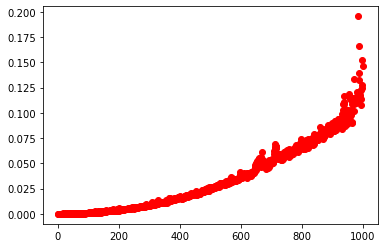

In [16]:
PlotTimes(1000)